In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
manual_annotations = pd.read_csv(r"/Users/user/Downloads/DFOCRP_H50bjRcb-WCV1 _ValidatedDetections.txt",sep="\t")

/var/folders/z0/r0qqn5l95fbfshftv56xpccc0000gn/T/ipykernel_995/753355904.py:1: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  manual_annotations = pd.read_csv(r"/Users/user/Downloads/DFOCRP_H50bjRcb-WCV1 _ValidatedDetections.txt",sep="\t")


In [64]:
manual_annotations.columns

Index(['Deploy.ID', 'Loc.ID', 'CRP_UID', 'PG.Id', 'UTC', 'UTCMilliseconds',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'detectionType',
       'Sound.ID.Species', 'KW.Type', 'Clan', 'Subclan', 'Pod', 'Call.Type',
       'Comments', 'duration.samp', 'Fs.Hz', 'duration.sec', 'lowFreq',
       'highFreq', 'UTC.recording.start.time'],
      dtype='object')

In [65]:
value_counts = manual_annotations['Sound.ID.Species'].value_counts()
total = value_counts.sum() 
value_counts

Sound.ID.Species
HW               283435
KW                30066
Vessel Noise       6083
PWSD               4434
HW/GW?              105
HW/KW?               80
KW?                  76
Fishing Gear         61
Unknown              52
Rissos               32
Odontocete           30
Mooring Noise        29
HW?                  24
KW/PWSD?             24
Nothing              23
GW?                  19
SPW                  11
Anchor Noise         10
No sound data        10
PWSD?                 9
Fish                  7
Odontocete?           4
Chain                 4
Rubbing               4
Chain?                1
ADCP                  1
Breach                1
Fish?                 1
HW/PWSD?              1
Blast/Breach          1
Rissos?               1
Vessel Noise?         1
Clang                 1
NPRW?HW?              1
KW?Fish?              1
Name: count, dtype: int64

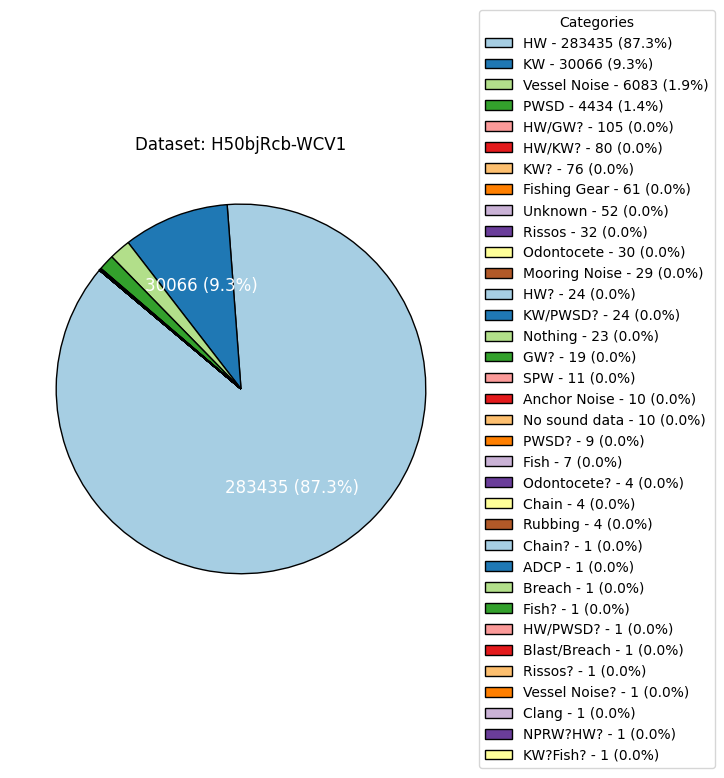

In [71]:
def autopct_format(pct, all_values):
    absolute = int(round(pct / 100.0 * sum(all_values)))
    return f"{absolute} ({pct:.1f}%)" if pct > 5 else ""  # Hide tiny values

# Step 4: Create labels with counts and percentages for the legend
legend_labels = [f"{cat} - {count} ({count / total:.1%})" for cat, count in value_counts.items()]

# Step 5: Plot pie chart without direct labels, only using the legend
plt.figure(figsize=(10, 6))
wedges, _, autotexts = plt.pie(
    value_counts, 
    labels=[None] * len(value_counts),  # Remove direct labels
    autopct=lambda pct: autopct_format(pct, value_counts),  
    startangle=140, 
    colors=plt.cm.Paired.colors, 
    wedgeprops={"edgecolor": "black"}  
)

# Customize percentage text inside the pie chart
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')

# Add legend with category name, count, and percentage
plt.legend(
    wedges, legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5)
)

plt.title("Dataset: H50bjRcb-WCV1")
plt.savefig("H50bjRcb-WCV1.jpg")
plt.show()